In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from prettytable import PrettyTable as pt
from sklearn import metrics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_excel('Win_Prediction_Data.xlsx')

In [4]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [6]:
df.describe()

,Deal Cost
count,1.006100e+04
mean,7.668969e+05
std,1.619894e+06
min,0.000000e+00
25%,1.897059e+05
50%,3.823529e+05
75%,7.647059e+05
max,3.676471e+07


In [7]:
df.nunique()

Client Category       41
Solution Type         67
Deal Date           2555
Sector                25
Location              13
VP Name               43
Manager Name         278
Deal Cost           1469
Deal Status Code       2
dtype: int64

In [8]:
df.describe(include='O')

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Status Code
count,9982,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1763,1439,2693,3360,1166,323,6306


# EDA WITH WIN % & WIN COUNTS WRT TO VP, MANAGER NAME COMBO.

# Data Separation as per data format.

In [9]:
cat_df=['Client Category', 'Solution Type', 'Sector', 'Location'] 
num_df=['Deal Cost'] 
target=['Deal Status Code']
Names_df=['VP Name', 'Manager Name']
date_df=['Deal Date']

<AxesSubplot:xlabel='Deal Status Code', ylabel='count'>

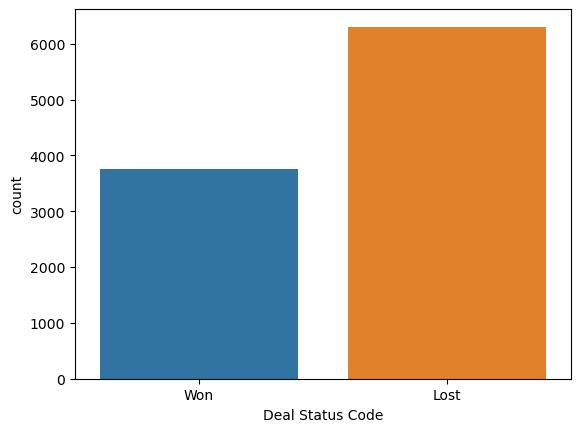

In [10]:
sns.countplot(x='Deal Status Code',data=df)

# Client Category

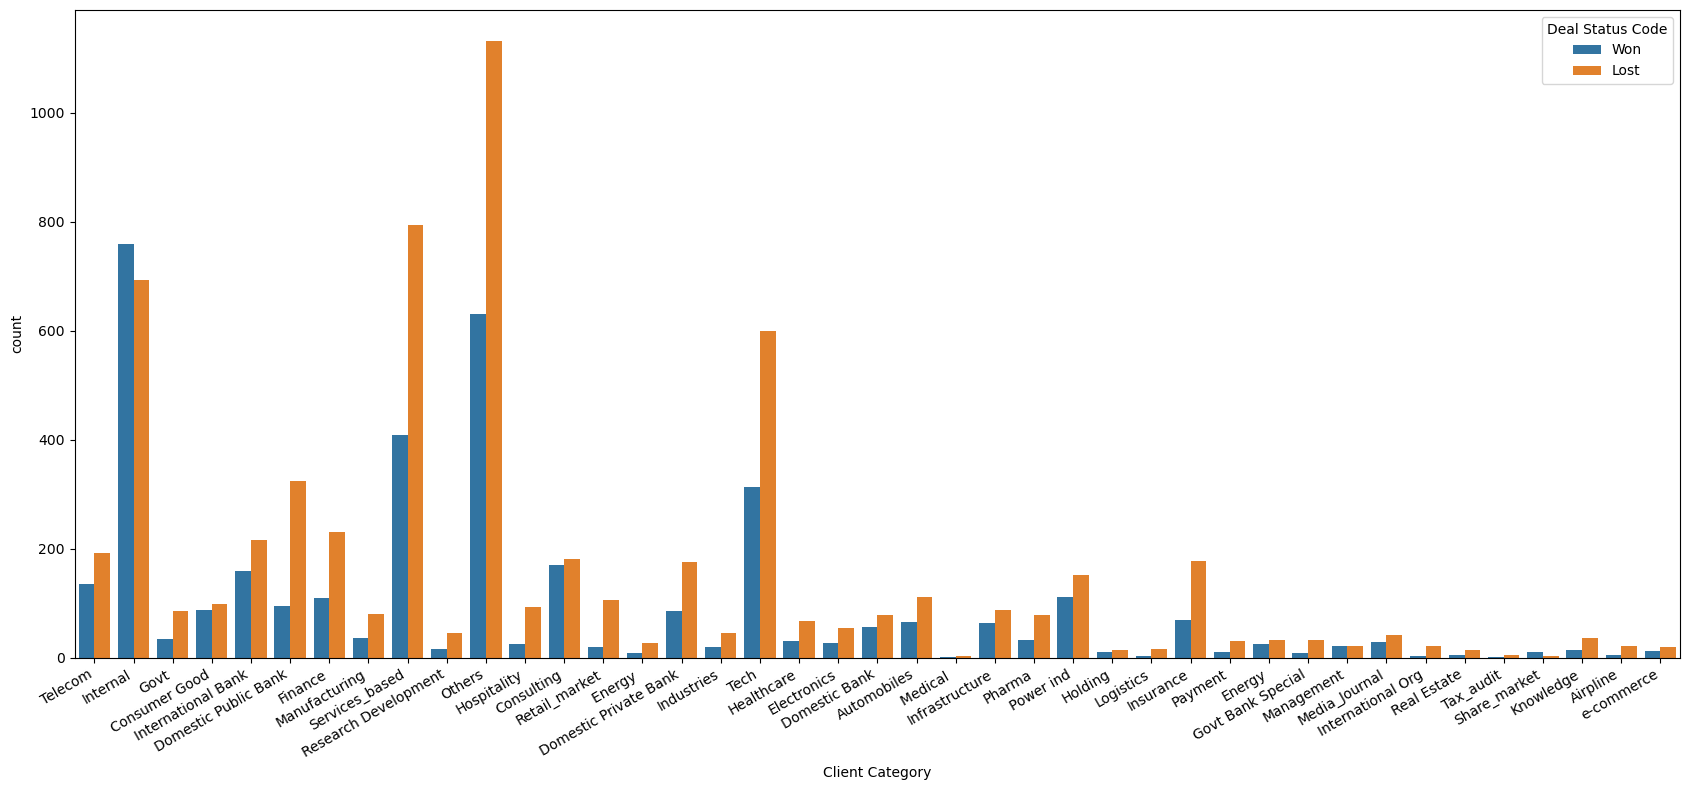

In [11]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x = "Client Category", hue = "Deal Status Code", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [12]:
#Win%age of Client Category column
Win_Ratio=pd.crosstab(df['Client Category'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Client Category,,,,
Share_market,4,10,14,71.428571
Internal,694,760,1454,52.269601
Management,22,21,43,48.837209
Consulting,182,170,352,48.295455
Consumer Good,98,87,185,47.027027
Holding,14,11,25,44.000000
Energy,32,25,57,43.859649
International Bank,216,160,376,42.553191
Power ind,152,112,264,42.424242


In [13]:
df["Name Pair"] = df["VP Name"]+" "+df["Manager Name"]

In [14]:
cc_df = df[df["Deal Status Code"]=="Won"][["Name Pair","Client Category"]]
cc_df.head()

,Name Pair,Client Category
0,Ekta Zutshi Gopa Trilochana,Telecom
1,Ekta Zutshi Gopa Trilochana,Telecom
6,Mervin Harwood rahul sharma,Internal
8,Lilli Storrs Md. Daud,Consumer Good
10,Long Bergstrom Luv Malhotra,International Bank


In [15]:
cc_df[cc_df["Client Category"]=="nan"]["Name Pair"].value_counts()

Series([], Name: Name Pair, dtype: int64)

In [16]:
cc_df["Client Category"].unique()

array(['Telecom', 'Internal', 'Consumer Good', 'International Bank',
       'Domestic Public Bank', 'Finance', 'Research Development',
       'Services_based', 'Consulting', 'Others', 'Manufacturing', 'Tech',
       'Domestic Private Bank', 'Healthcare', 'Electronics',
       'Automobiles', 'Industries', 'Domestic Bank', 'Pharma',
       'Power ind', 'Hospitality', 'Insurance', 'Payment',
       'Govt Bank Special', 'Management', 'Media_Journal',
       'Retail_market', 'Infrastructure', 'Energy', 'Govt', nan,
       'Tax_audit', 'Share_market', 'Logistics', 'Knowledge', 'Energy ',
       'Airpline', 'e-commerce', 'Holding', 'Real Estate',
       'International Org', 'Medical '], dtype=object)

In [17]:
cc_uniq_list = ['Telecom', 'Internal', 'Consumer Good', 'International Bank',
       'Domestic Public Bank', 'Finance', 'Research Development',
       'Services_based', 'Consulting', 'Others', 'Manufacturing', 'Tech',
       'Domestic Private Bank', 'Healthcare', 'Electronics',
       'Automobiles', 'Industries', 'Domestic Bank', 'Pharma',
       'Power ind', 'Hospitality', 'Insurance', 'Payment',
       'Govt Bank Special', 'Management', 'Media_Journal',
       'Retail_market', 'Infrastructure', 'Energy', 'Govt',
       'Tax_audit', 'Share_market', 'Logistics', 'Knowledge', 'Energy ',
       'Airpline', 'e-commerce', 'Holding', 'Real Estate',
       'International Org', 'Medical ']

In [18]:
cc_table=pt(["Client Category","Names","Won Counts"])
for i in cc_uniq_list:
    cc_table.add_row([i,cc_df[cc_df["Client Category"]==i]["Name Pair"].value_counts().index[0],cc_df[cc_df["Client Category"]==i]["Name Pair"].value_counts()[0]])

In [19]:
cc_table.sortby = 'Won Counts'
cc_table.reversesort = True
cc_table

Client Category,Names,Won Counts
Others,Long Bergstrom Karna Bhuvennant,31
Consulting,Ekta Zutshi neeraj kumar,30
Internal,Ankita Aggarwal Desmond Krout,29
Tech,Rahul Bajpai Rudraksh Sharma,28
Telecom,Rahul Bajpai Abhiskek Kumar,27
Services_based,Long Bergstrom Russell Dahlen,24
International Bank,Long Bergstrom Russell Dahlen,23
Consumer Good,Mangesh K. Singh Darin Vath,23
Domestic Public Bank,Mervin Harwood Rosana Yokum,15
Automobiles,Mangesh K. Singh Kamelesh Srinivasan,12


# Solution Type

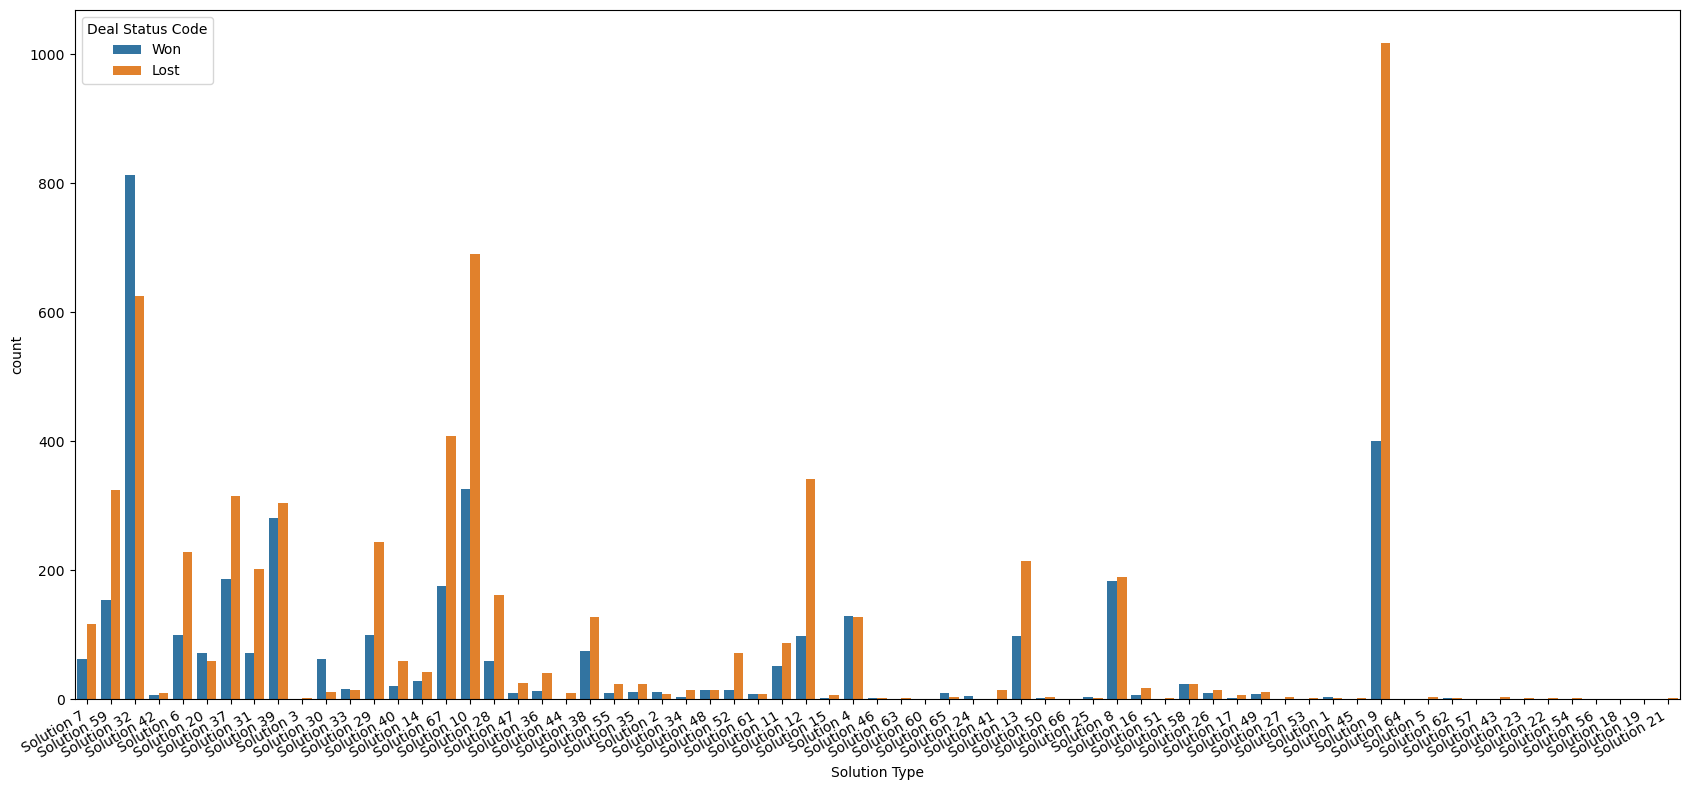

In [20]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x = "Solution Type", hue = "Deal Status Code", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [21]:
#Win%age of Solution Type column
Win_Ratio=pd.crosstab(df['Solution Type'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Solution Type,,,,
Solution 24,0,5,5,100.000000
Solution 19,0,1,1,100.000000
Solution 66,0,1,1,100.000000
Solution 64,0,1,1,100.000000
Solution 60,0,1,1,100.000000
Solution 57,0,1,1,100.000000
Solution 56,0,1,1,100.000000
Solution 18,0,1,1,100.000000
Solution 30,12,62,74,83.783784


# Years, Months & Quarter Wise.

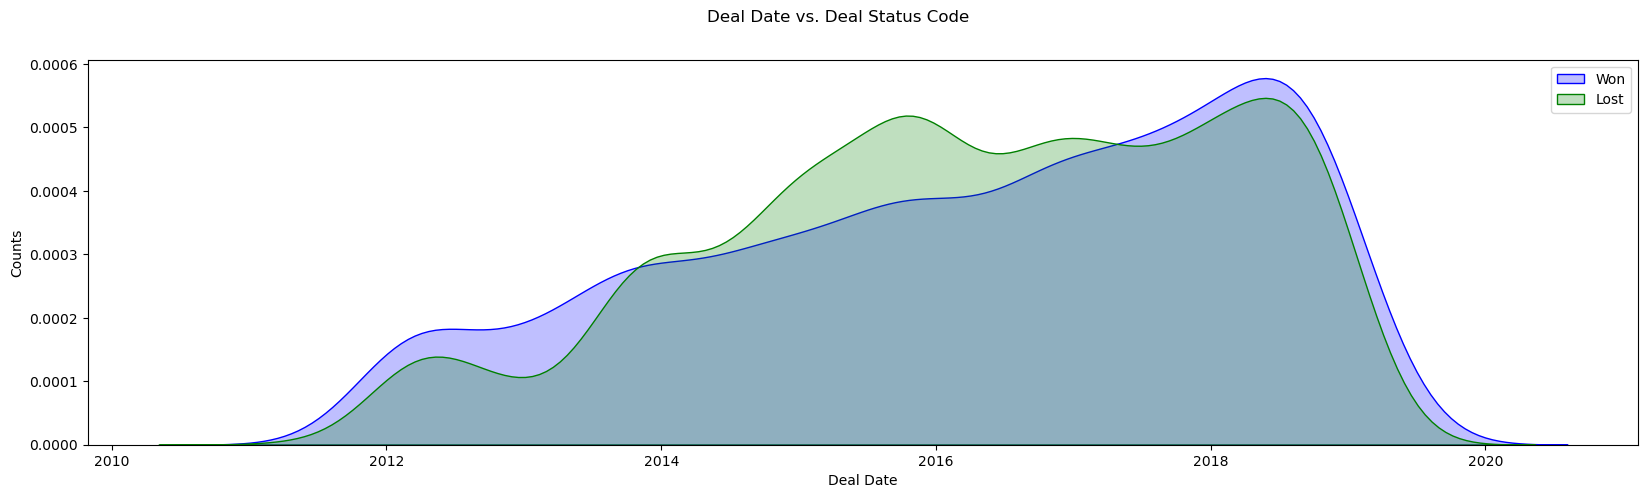

In [22]:
fig,ax = plt.subplots(figsize=(20,5))

sns.kdeplot(df[df["Deal Status Code"]=="Won"]["Deal Date"], shade=True, color="blue", label="Won",ax=ax)
sns.kdeplot(df[df["Deal Status Code"]=="Lost"]["Deal Date"], shade=True, color="green", label="Lost",ax=ax)

ax.set_xlabel("Deal Date")
ax.set_ylabel("Counts")

fig.suptitle("Deal Date vs. Deal Status Code")

ax.legend();

# Sector

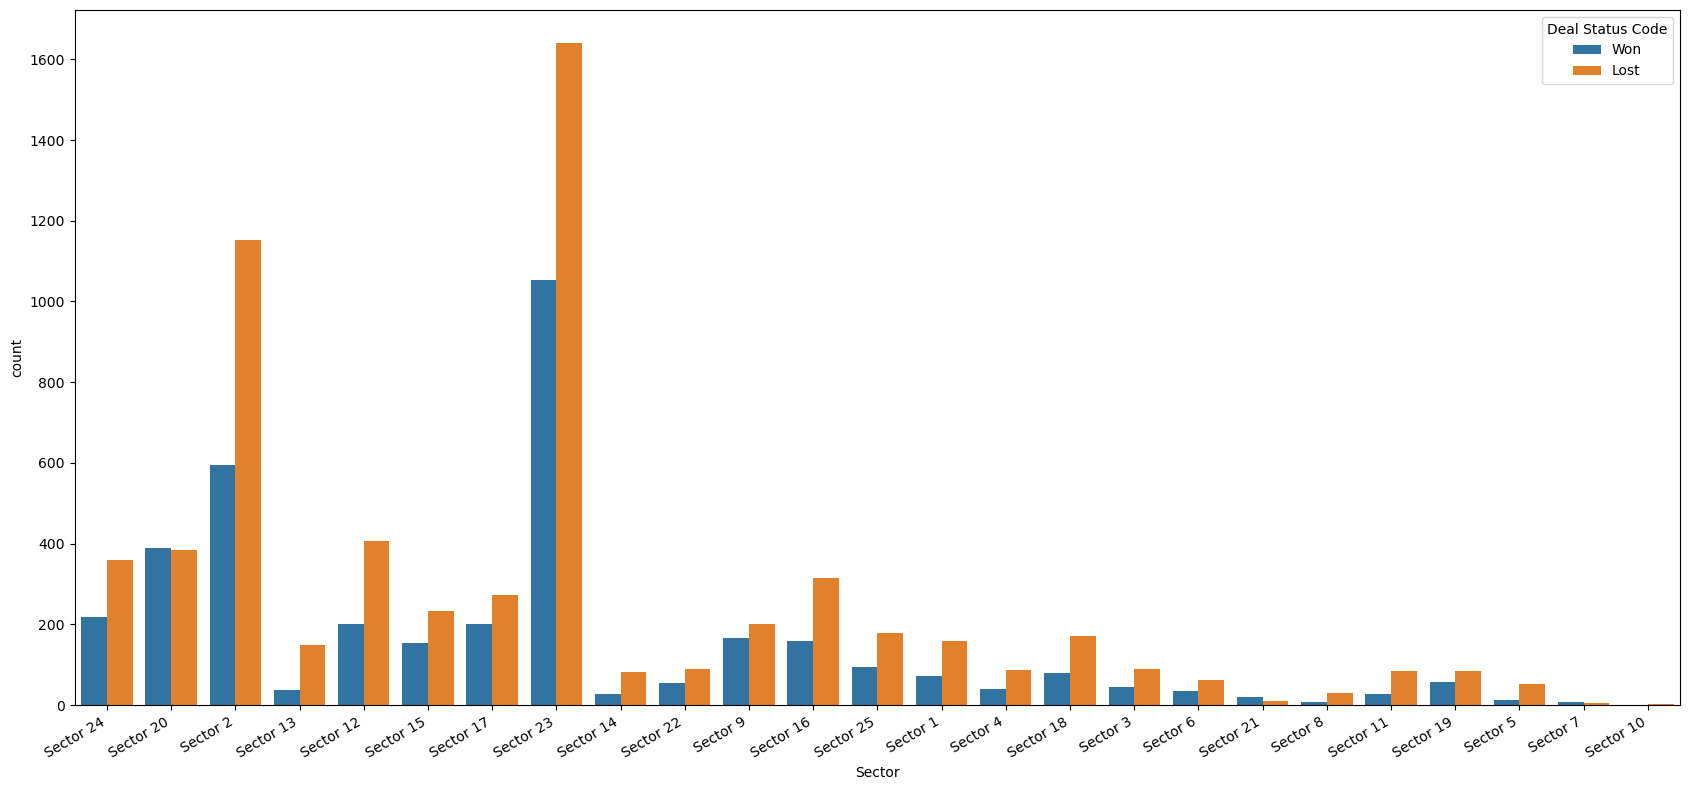

In [23]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x = "Sector", hue = "Deal Status Code", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [24]:
#Win%age of Sector column
Win_Ratio=pd.crosstab(df['Sector'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Sector,,,,
Sector 21,10,20,30,66.666667
Sector 7,6,8,14,57.142857
Sector 20,384,389,773,50.323415
Sector 9,202,167,369,45.257453
Sector 17,274,200,474,42.194093
Sector 19,84,58,142,40.845070
Sector 15,234,153,387,39.534884
Sector 23,1640,1053,2693,39.101374
Sector 24,360,218,578,37.716263


In [25]:
sect_df = df[df["Deal Status Code"]=="Won"][["Name Pair","Sector"]]
sect_df["Sector"].head()

0     Sector 24
1     Sector 24
6      Sector 2
8     Sector 12
10     Sector 2
Name: Sector, dtype: object

In [26]:
sect_table=pt(["Sector","Names","Won Counts"])
for i in range(1,len(sect_df["Sector"].unique())):
    sect_table.add_row(["Sector {}".format(i),sect_df[sect_df["Sector"]=="Sector {}".format(i)]["Name Pair"].value_counts().index[0],sect_df[sect_df["Sector"]=="Sector {}".format(i)]["Name Pair"].value_counts()[0]])

In [27]:
sect_table.sortby = 'Won Counts'
sect_table.reversesort = True
sect_table

Sector,Names,Won Counts
Sector 23,neeraj kumar Molly Eakes,53
Sector 2,Long Bergstrom Russell Dahlen,35
Sector 24,Rahul Bajpai Abhiskek Kumar,27
Sector 12,Mangesh K. Singh Darin Vath,27
Sector 15,Rahul Bajpai Rudraksh Sharma,24
Sector 20,Ankita Aggarwal Desmond Krout,23
Sector 18,Rahul Bajpai Rudraksh Sharma,13
Sector 1,Mangesh K. Singh Kamelesh Srinivasan,12
Sector 21,Long Bergstrom Karna Bhuvennant,9
Sector 17,Russell Dahlen Martin Cheyne,9


# Location

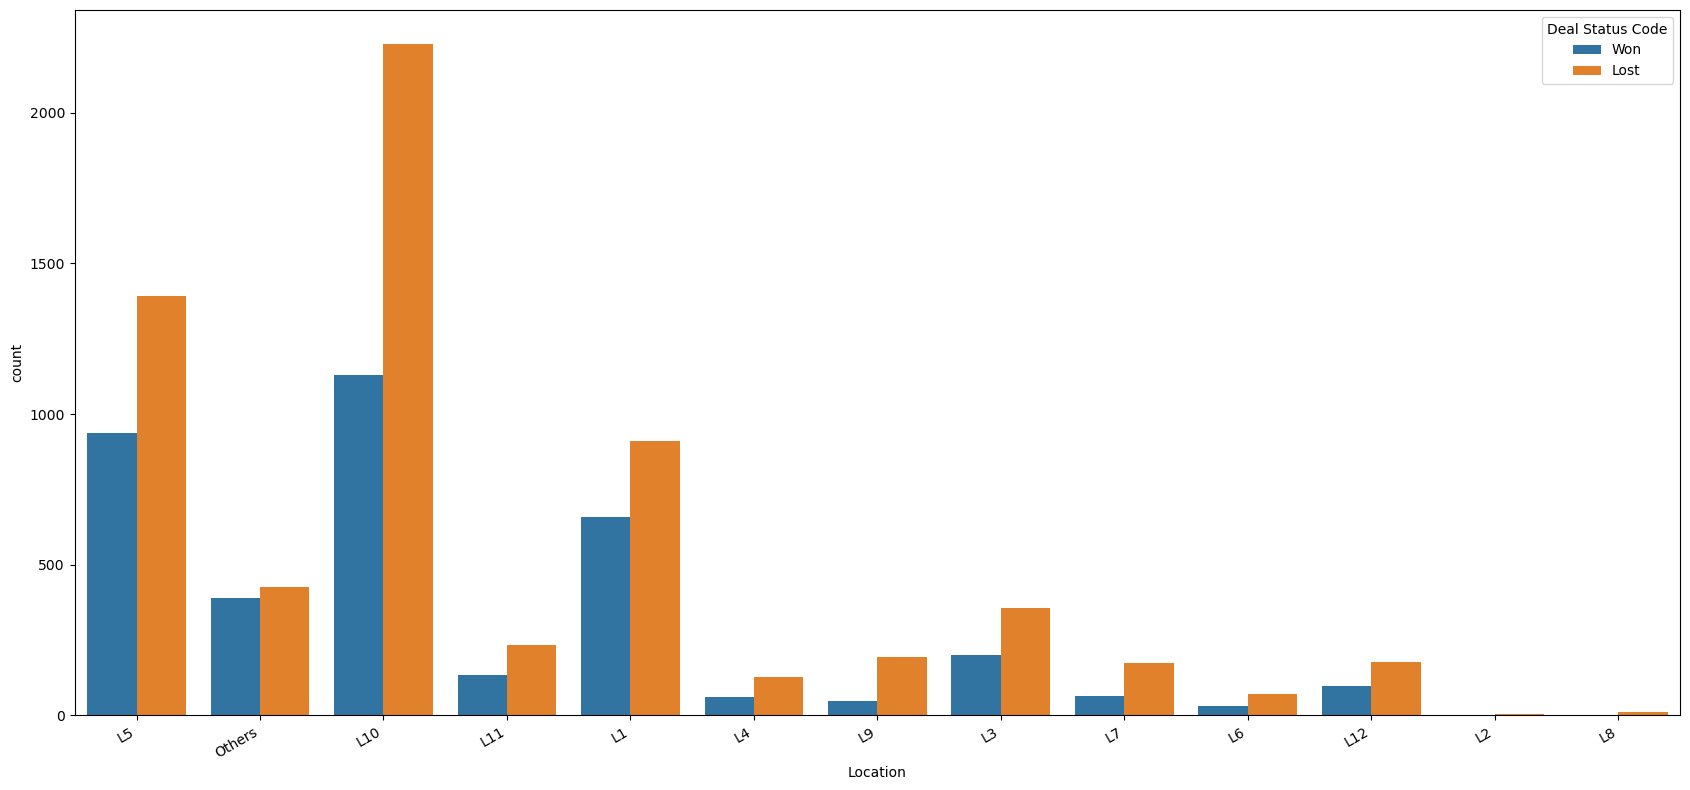

In [28]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x = "Location", hue = "Deal Status Code", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [29]:
#Win%age of Location column
Win_Ratio=pd.crosstab(df['Location'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Location,,,,
Others,426,391,817,47.858017
L1,912,660,1572,41.984733
L5,1392,936,2328,40.206186
L11,232,135,367,36.784741
L3,356,200,556,35.971223
L12,178,98,276,35.507246
L10,2230,1130,3360,33.630952
L4,126,62,188,32.978723
L6,70,30,100,30.000000


In [30]:
loc_df = df[df["Deal Status Code"]=="Won"][["Name Pair","Location"]]
loc_df.head()

,Name Pair,Location
0,Ekta Zutshi Gopa Trilochana,L5
1,Ekta Zutshi Gopa Trilochana,L5
6,Mervin Harwood rahul sharma,L10
8,Lilli Storrs Md. Daud,L10
10,Long Bergstrom Luv Malhotra,L10


In [31]:
loc_table=pt(["Location","Names","Won Counts"])
loc_table.add_row(["Others",loc_df[loc_df["Location"]=="Others"]["Name Pair"].value_counts().index[0],loc_df[loc_df["Location"]=="Others"]["Name Pair"].value_counts()[0]])
Loc,Names,Counts=[],[],[]
for i in range(1,len(loc_df["Location"].unique())):
    loc_table.add_row(["Location {}".format(i),loc_df[loc_df["Location"]=="L{}".format(i)]["Name Pair"].value_counts().index[0],loc_df[loc_df["Location"]=="L{}".format(i)]["Name Pair"].value_counts()[0]])

In [32]:
loc_table.sortby = 'Won Counts'
loc_table.reversesort = True
loc_table

Location,Names,Won Counts
Location 5,Rahul Bajpai Rudraksh Sharma,70
Location 1,neeraj kumar Molly Eakes,54
Location 10,Long Bergstrom Russell Dahlen,53
Location 11,Long Bergstrom Jewell Tunstall,30
Location 3,Ekta Zutshi Jean Sappington,29
Others,Ankita Aggarwal Desmond Krout,22
Location 4,Ekta Zutshi Gayle Molter,19
Location 9,Sargar Deep Rao Manpreet Singh,10
Location 6,som dutt Roop Sachdeva,7
Location 7,Long Bergstrom Ayusha Gupta,6


# VP Name

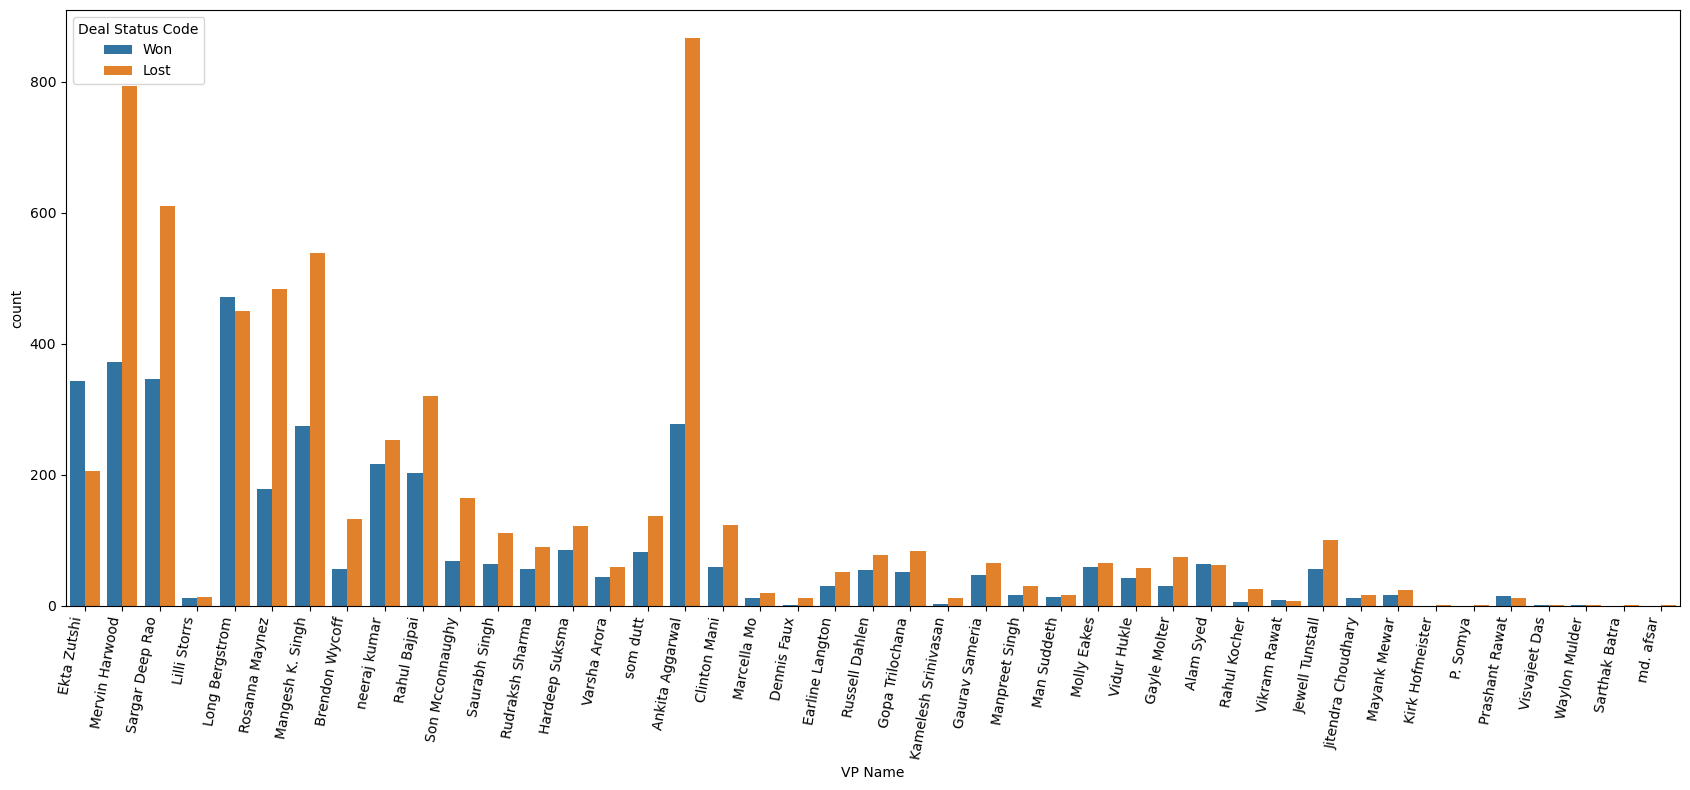

In [33]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x = "VP Name", hue = "Deal Status Code", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
plt.tight_layout()
plt.show()

In [34]:
#Win%age of VP Name column
Win_Ratio=pd.crosstab(df["Name Pair"],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Name Pair,,,,
som dutt som dutt,0,2,2,100.0
Hardeep Suksma Russell Dahlen,0,1,1,100.0
Jewell Tunstall pooran chand,0,1,1,100.0
Jewell Tunstall Anchal Pandey,0,2,2,100.0
Hardeep Suksma vansu dev,0,6,6,100.0
Hardeep Suksma shyam kumar,0,1,1,100.0
Hardeep Suksma Waseem Khan,0,1,1,100.0
Son Mcconnaughy Anchal Pandey,0,1,1,100.0
Son Mcconnaughy Arti Bindra,0,1,1,100.0


# LOST % & LOST COUNTS WRT TO VP, MANAGER NAME COMBO.

# Client Category

In [35]:
#Lost%age of Client Category column
Win_Ratio=pd.crosstab(df['Client Category'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Lost']+Win_Ratio['Lost'])
Win_Ratio['Lost%']=(Win_Ratio['Lost']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Lost%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Lost%
Client Category,,,,
Airpline,22,5,44,50.0
International Org,22,3,44,50.0
Logistics,16,4,32,50.0
Management,22,21,44,50.0
Manufacturing,80,37,160,50.0
Media_Journal,42,29,84,50.0
Medical,4,1,8,50.0
Others,1132,631,2264,50.0
Payment,30,10,60,50.0


In [36]:
cc_df_lost = df[df["Deal Status Code"]=="Lost"][["Name Pair","Client Category"]]
cc_df_lost.head()

,Name Pair,Client Category
2,Ekta Zutshi Russell Dahlen,Internal
3,Ekta Zutshi Russell Dahlen,Internal
4,Ekta Zutshi Russell Dahlen,Internal
5,Ekta Zutshi Russell Dahlen,Internal
7,Sargar Deep Rao Vidur Hukle,Govt


In [37]:
cc_df_lost[cc_df_lost["Client Category"]=="nan"]["Name Pair"].value_counts()

Series([], Name: Name Pair, dtype: int64)

In [38]:
cc_df_lost["Client Category"].unique()

array(['Internal', 'Govt', 'Manufacturing', 'Finance', 'Services_based',
       'Others', 'Hospitality', 'Telecom', 'Research Development',
       'Retail_market', 'Energy ', 'Domestic Private Bank', 'Industries',
       'International Bank', 'Consulting', 'Domestic Bank', 'Automobiles',
       'Tech', 'Medical ', 'Infrastructure', 'Domestic Public Bank',
       'Holding', 'Logistics', 'Insurance', 'Energy', 'Power ind',
       'International Org', 'Payment', 'Real Estate', 'Pharma',
       'Consumer Good', nan, 'Govt Bank Special', 'Media_Journal',
       'Tax_audit', 'Knowledge', 'Healthcare', 'Airpline', 'Electronics',
       'Management', 'e-commerce', 'Share_market'], dtype=object)

In [39]:
cc_uniq_list = ['Telecom', 'Internal', 'Consumer Good', 'International Bank',
       'Domestic Public Bank', 'Finance', 'Research Development',
       'Services_based', 'Consulting', 'Others', 'Manufacturing', 'Tech',
       'Domestic Private Bank', 'Healthcare', 'Electronics',
       'Automobiles', 'Industries', 'Domestic Bank', 'Pharma',
       'Power ind', 'Hospitality', 'Insurance', 'Payment',
       'Govt Bank Special', 'Management', 'Media_Journal',
       'Retail_market', 'Infrastructure', 'Energy', 'Govt',
       'Tax_audit', 'Share_market', 'Logistics', 'Knowledge', 'Energy ',
       'Airpline', 'e-commerce', 'Holding', 'Real Estate',
       'International Org', 'Medical ']

In [40]:
cc_table_lost=pt(["Client Category","Names","Lost Counts"])
for i in cc_uniq_list:
    cc_table_lost.add_row([i,cc_df_lost[cc_df_lost["Client Category"]==i]["Name Pair"].value_counts().index[0],cc_df_lost[cc_df_lost["Client Category"]==i]["Name Pair"].value_counts()[0]])

In [41]:
cc_table_lost.sortby = 'Lost Counts'
cc_table_lost.reversesort = True
cc_table_lost

Client Category,Names,Lost Counts
Internal,Ankita Aggarwal Desmond Krout,70
Domestic Public Bank,Ankita Aggarwal Manish Saundriyal,52
Hospitality,Sargar Deep Rao Manpreet Singh,40
Others,Rahul Bajpai Rudraksh Sharma,32
Tech,neeraj kumar Rayford Durgan,24
Services_based,Ankita Aggarwal Desmond Krout,24
Domestic Private Bank,Rosanna Maynez Abhinav Warrier,20
Consulting,neeraj kumar Molly Eakes,20
Telecom,Sargar Deep Rao Gopa Trilochana,18
Govt,Mervin Harwood Akshay Sharma,16


# Sector

In [42]:
#Lost%age of Sector column
Win_Ratio=pd.crosstab(df['Sector'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Lost']+Win_Ratio['Lost'])
Win_Ratio['Lost%']=(Win_Ratio['Lost']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Lost%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Lost%
Sector,,,,
Sector 1,158,73,316,50.0
Sector 21,10,20,20,50.0
Sector 8,30,9,60,50.0
Sector 7,6,8,12,50.0
Sector 6,62,34,124,50.0
Sector 5,52,12,104,50.0
Sector 4,88,40,176,50.0
Sector 3,90,45,180,50.0
Sector 25,178,95,356,50.0


In [43]:
sect_df_lost = df[df["Deal Status Code"]=="Lost"][["Name Pair","Sector"]]
sect_df_lost.head()

,Name Pair,Sector
2,Ekta Zutshi Russell Dahlen,Sector 20
3,Ekta Zutshi Russell Dahlen,Sector 20
4,Ekta Zutshi Russell Dahlen,Sector 20
5,Ekta Zutshi Russell Dahlen,Sector 20
7,Sargar Deep Rao Vidur Hukle,Sector 13


In [44]:
sect_table_lost=pt(["Sector","Names","Lost Counts"])
for i in range(1,len(sect_df_lost["Sector"].unique())):
    sect_table_lost.add_row(["Sector {}".format(i),sect_df_lost[sect_df_lost["Sector"]=="Sector {}".format(i)]["Name Pair"].value_counts().index[0],sect_df_lost[sect_df_lost["Sector"]=="Sector {}".format(i)]["Name Pair"].value_counts()[0]])

In [45]:
sect_table_lost.sortby = 'Lost Counts'
sect_table_lost.reversesort = True
sect_table_lost

Sector,Names,Lost Counts
Sector 23,neeraj kumar Molly Eakes,60
Sector 2,Ankita Aggarwal Manish Saundriyal,58
Sector 20,Ankita Aggarwal Desmond Krout,44
Sector 12,Sargar Deep Rao Manpreet Singh,38
Sector 24,Sargar Deep Rao Gopa Trilochana,28
Sector 4,Mervin Harwood Akshay Sharma,16
Sector 15,Rahul Bajpai Rudraksh Sharma,16
Sector 9,Sargar Deep Rao Vidur Hukle,14
Sector 17,Mervin Harwood Jackie Wolfson,14
Sector 16,Mangesh K. Singh ram kumar,12


# Location

In [46]:
#Win%age of Location column
Win_Ratio=pd.crosstab(df['Location'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Lost']+Win_Ratio['Lost'])
Win_Ratio['Lost%']=(Win_Ratio['Lost']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Lost%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Lost%
Location,,,,
L1,912,660,1824,50.0
L10,2230,1130,4460,50.0
L11,232,135,464,50.0
L12,178,98,356,50.0
L2,6,2,12,50.0
L3,356,200,712,50.0
L4,126,62,252,50.0
L5,1392,936,2784,50.0
L6,70,30,140,50.0


In [47]:
loc_df_lost = df[df["Deal Status Code"]=="Lost"][["Name Pair","Location"]]
loc_df_lost.head()

,Name Pair,Location
2,Ekta Zutshi Russell Dahlen,Others
3,Ekta Zutshi Russell Dahlen,Others
4,Ekta Zutshi Russell Dahlen,Others
5,Ekta Zutshi Russell Dahlen,Others
7,Sargar Deep Rao Vidur Hukle,L5


In [48]:
loc_table_lost=pt(["Location","Names","Lost Counts"])
loc_table_lost.add_row(["Others",loc_df_lost[loc_df_lost["Location"]=="Others"]["Name Pair"].value_counts().index[0],loc_df_lost[loc_df_lost["Location"]=="Others"]["Name Pair"].value_counts()[0]])
Loc,Names,Counts=[],[],[]
for i in range(1,len(loc_df_lost["Location"].unique())):
    loc_table_lost.add_row(["Location {}".format(i),loc_df_lost[loc_df_lost["Location"]=="L{}".format(i)]["Name Pair"].value_counts().index[0],loc_df_lost[loc_df_lost["Location"]=="L{}".format(i)]["Name Pair"].value_counts()[0]])

In [49]:
loc_table_lost.sortby = 'Lost Counts'
loc_table_lost.reversesort = True
loc_table_lost

Location,Names,Lost Counts
Location 5,Rahul Bajpai Rudraksh Sharma,102
Location 10,Ankita Aggarwal Manish Saundriyal,78
Location 1,neeraj kumar Molly Eakes,68
Location 11,Long Bergstrom Jewell Tunstall,56
Others,Ankita Aggarwal Desmond Krout,46
Location 9,Sargar Deep Rao Manpreet Singh,42
Location 4,Rosanna Maynez Abhinav Warrier,42
Location 3,neeraj kumar Rayford Durgan,26
Location 7,Rosanna Maynez Ayusha Gupta,24
Location 12,Ankita Aggarwal bhagwati prasad,20


In [50]:
#Win%age of VP Name column
Loss_Ratio=pd.crosstab(df["Name Pair"],df['Deal Status Code'])
Loss_Ratio['Total']=(Loss_Ratio['Lost']+Loss_Ratio['Lost'])
Loss_Ratio['Lost%']=(Loss_Ratio['Lost']*100)/(Loss_Ratio['Total'])
Loss_Ratio.sort_values(by=['Lost%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Lost%
Name Pair,,,,
Alam Syed Abhinav Warrier,2,0,4,50.0
Sargar Deep Rao Abhishek Singhal,16,8,32,50.0
Rosanna Maynez Deepak Chandra Prakash,2,0,4,50.0
Rosanna Maynez Dennis Faux,2,3,4,50.0
Rosanna Maynez Desmond Krout,10,5,20,50.0
Rosanna Maynez Devendra Vishvakarma,6,0,12,50.0
Rosanna Maynez Earline Langton,26,10,52,50.0
Rosanna Maynez Evangeline Kepley,2,0,4,50.0
Rosanna Maynez Fredricka Bald,12,16,24,50.0


# DATA CLEANING

# REPLACED NULL WITH MODE

In [52]:
df.isna().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
Name Pair            0
dtype: int64

In [53]:
df['Client Category']=df['Client Category'].fillna(df['Client Category'].mode()[0]) 

In [54]:
df.isna().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
Name Pair           0
dtype: int64

# REPLACED THE DEAL COST VALUE WITH MEAN

In [55]:
for i in df['Deal Cost']:
    if i==0:
        df['Deal Cost']=df['Deal Cost'].replace(i,df['Deal Cost'].mean())

In [56]:
df['Deal Cost'].tail(50)

10011     382352.94
10012    1235294.12
10013    1382352.94
10014     204117.65
10015     235294.12
10016     144117.65
10017     461764.71
10018    1882352.94
10019    1058823.53
10020     220588.24
10021     220588.24
10022     502941.18
10023     235294.12
10024     882352.94
10025     382352.94
10026     176470.59
10027     426470.59
10028    1122058.82
10029     424705.88
10030     426470.59
10031     352941.18
10032      72941.18
10033     733529.41
10034    1122058.82
10035     213235.29
10036     352941.18
10037     176470.59
10038     529411.77
10039     383823.53
10040     276470.59
10041     147058.82
10042     102941.18
10043      73529.41
10044     701470.59
10045     147058.82
10046     383823.53
10047      55000.00
10048     701470.59
10049     470588.24
10050     882352.94
10051    1404411.77
10052     823529.41
10053    3462058.82
10054      58823.53
10055     823529.41
10056     588235.29
10057     777058.82
10058     588235.29
10059    3042058.82
10060     147058.82


# OUTLIERS TREATMENT USING IQR METHOD

<AxesSubplot:xlabel='Deal Cost'>

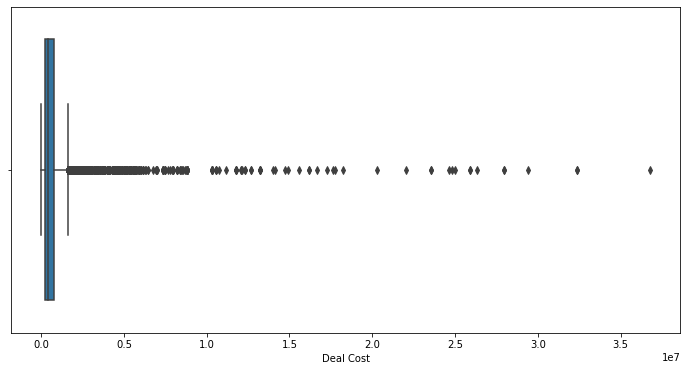

In [57]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(df['Deal Cost'])

# IQR METHOD

In [58]:
df['Deal Cost'] = df['Deal Cost'].astype(int)

In [59]:
Q1=np.percentile(df['Deal Cost'],25)
Q3=np.percentile(df['Deal Cost'],75)

In [60]:
IQR = Q3-Q1
upper=Q3+1.5*IQR
lower = Q1 -1.5*IQR

In [61]:
df['Deal Cost'].describe()

count    1.006100e+04
mean     7.856477e+05
std      1.615340e+06
min      2.940000e+02
25%      2.058820e+05
50%      4.117640e+05
75%      7.668960e+05
max      3.676470e+07
Name: Deal Cost, dtype: float64

In [62]:
df['Deal Cost']=np.where(df['Deal Cost']>upper,upper,df['Deal Cost'])

<AxesSubplot:xlabel='Deal Cost'>

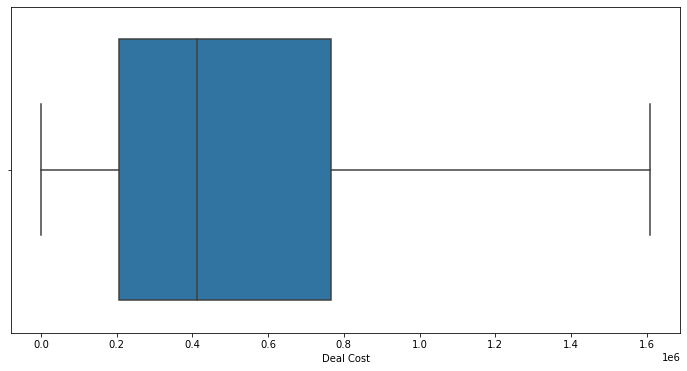

In [63]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(df['Deal Cost'])

# BALANCING DATA USING LOGARITHMIC TRANSFORMATION

In [64]:
df['Deal Cost']=np.log(df['Deal Cost'])

In [65]:
df['Deal Cost'].describe()

count    10061.000000
mean        12.804678
std          1.173087
min          5.683580
25%         12.235058
50%         12.928206
75%         13.550106
max         14.290761
Name: Deal Cost, dtype: float64

In [66]:
df.shape

(10061, 10)

# ENCODING USING TARGET/MEAN ENCODING & LABEL ENCODING

We have use target encoding involves replacing a categorical feature with average target value of all data points belonging to the category and label encoding for target variable as 0 for 'Lost' and 1 for 'Won'

In [67]:
for col in Names_df+ cat_df:
    print(col, ': ', len(df[col].unique()), ' labels')

VP Name :  43  labels
Manager Name :  278  labels
Client Category :  41  labels
Solution Type :  67  labels
Sector :  25  labels
Location :  13  labels


In [68]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
te = TargetEncoder()

In [69]:
df['Deal Status Code']=le.fit_transform(df['Deal Status Code'].values)

In [70]:
df['Client Category Encoded'] = te.fit_transform(df['Client Category'], df['Deal Status Code'])
df['Solution Type Encoded'] = te.fit_transform(df['Solution Type'], df['Deal Status Code'])
df['Sector Encoded'] = te.fit_transform(df['Sector'], df['Deal Status Code'])
df['Location Encoded'] = te.fit_transform(df['Location'], df['Deal Status Code'])
df['Name Pair Encoded'] = te.fit_transform(df['Name Pair'], df['Deal Status Code'])

In [71]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Name Pair,Client Category Encoded,Solution Type Encoded,Sector Encoded,Location Encoded,Name Pair Encoded
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,11.918391,1,Ekta Zutshi Gopa Trilochana,0.412844,0.348315,0.377163,0.402062,0.515152
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,13.520743,1,Ekta Zutshi Gopa Trilochana,0.412844,0.348315,0.377163,0.402062,0.515152
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,11.002100,0,Ekta Zutshi Russell Dahlen,0.522696,0.322176,0.503234,0.478580,0.017700
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,11.002100,0,Ekta Zutshi Russell Dahlen,0.522696,0.322176,0.503234,0.478580,0.017700
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,11.300747,0,Ekta Zutshi Russell Dahlen,0.522696,0.564976,0.503234,0.478580,0.017700


In [72]:
df['Deal Cost']=np.log(df['Deal Cost'])

In [73]:
df.describe()

,Deal Cost,Deal Status Code,Client Category Encoded,Solution Type Encoded,Sector Encoded,Location Encoded,Name Pair Encoded
count,10061.000000,10061.000000,10061.000000,10061.000000,10061.000000,10061.000000,1.006100e+04
mean,2.544900,0.373223,0.373225,0.372931,0.373225,0.373223,3.650482e-01
std,0.103610,0.483685,0.088292,0.121528,0.062392,0.056040,2.189555e-01
min,1.737581,0.000000,0.120000,0.000046,0.187500,0.090922,1.141699e-07
25%,2.504305,0.000000,0.339434,0.282087,0.340961,0.336310,2.000000e-01
50%,2.559411,0.000000,0.353963,0.320866,0.377163,0.367847,3.461538e-01
75%,2.606394,1.000000,0.424242,0.480342,0.391014,0.402062,4.782609e-01
max,2.659613,1.000000,0.714285,0.988727,0.666667,0.478580,1.000000e+00


# CHECK CORR() USING HEATMAP

In [74]:
df.corr()

,Deal Cost,Deal Status Code,Client Category Encoded,Solution Type Encoded,Sector Encoded,Location Encoded,Name Pair Encoded
Deal Cost,1.000000,-0.044853,0.035271,0.036857,-0.023768,0.033441,0.006503
Deal Status Code,-0.044853,1.000000,0.182549,0.252080,0.128995,0.115861,0.473943
Client Category Encoded,0.035271,0.182549,1.000000,0.120859,0.276455,0.353399,0.143025
Solution Type Encoded,0.036857,0.252080,0.120859,1.000000,0.110843,0.016582,0.350881
Sector Encoded,-0.023768,0.128995,0.276455,0.110843,1.000000,0.280119,0.105040
Location Encoded,0.033441,0.115861,0.353399,0.016582,0.280119,1.000000,0.079038
Name Pair Encoded,0.006503,0.473943,0.143025,0.350881,0.105040,0.079038,1.000000


<AxesSubplot:>

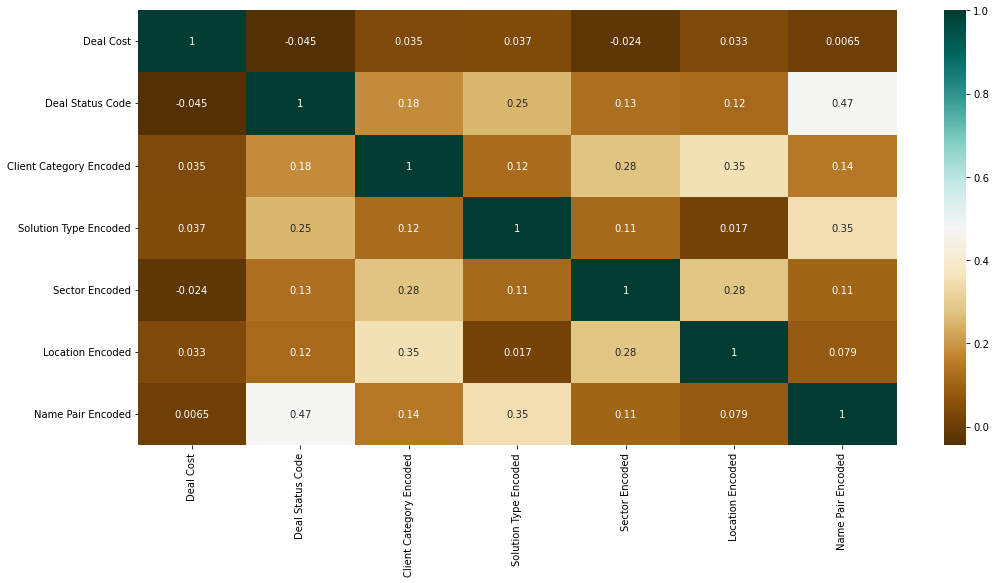

In [75]:
plt.figure(figsize=(17,8))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [76]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Name Pair,Client Category Encoded,Solution Type Encoded,Sector Encoded,Location Encoded,Name Pair Encoded
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,2.478083,1,Ekta Zutshi Gopa Trilochana,0.412844,0.348315,0.377163,0.402062,0.515152
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,2.604225,1,Ekta Zutshi Gopa Trilochana,0.412844,0.348315,0.377163,0.402062,0.515152
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,2.398086,0,Ekta Zutshi Russell Dahlen,0.522696,0.322176,0.503234,0.478580,0.017700
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,2.398086,0,Ekta Zutshi Russell Dahlen,0.522696,0.322176,0.503234,0.478580,0.017700
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,2.424869,0,Ekta Zutshi Russell Dahlen,0.522696,0.564976,0.503234,0.478580,0.017700


# Features Selection

In [77]:
df2=df.reindex(columns= ['Client Category Encoded', 'Solution Type Encoded','Sector Encoded','Name Pair Encoded','Deal Cost','Deal Status Code'])

# TRAIN TEST SPLIT

In [78]:
x=df2.drop(columns=["Deal Status Code"],axis=1)
y=df2["Deal Status Code"]

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# DATA SCALING

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [81]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# USED LOGISTIC REGRESSION TO BUILD MODEL

In [82]:
from sklearn.linear_model import LogisticRegression
lor= LogisticRegression()
lor.fit(x_train,y_train)

LogisticRegression()

In [83]:
pred_lor= lor.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [85]:
acc_lor = round( metrics.accuracy_score(y_test, pred_lor) * 100 , 2 )
print( 'Accuracy of Logistic Regression model : ', acc_lor )

Accuracy of Logistic Regression model :  72.81


In [123]:
print(classification_report(y_test, pred_lor))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1883
           1       0.69      0.50      0.58      1136

    accuracy                           0.73      3019
   macro avg       0.72      0.68      0.69      3019
weighted avg       0.72      0.73      0.72      3019



In [87]:
print(confusion_matrix(y_test, pred_lor))

#TP FN
#FP TN

[[1635  248]
 [ 573  563]]


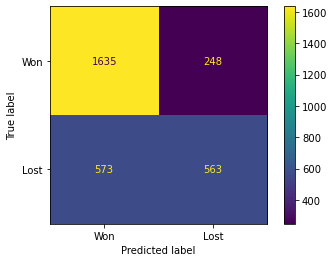

In [88]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,roc_auc_score,roc_curve
plot_confusion_matrix(lor, x_test, y_test, values_format='d', display_labels=['Won', 'Lost'])

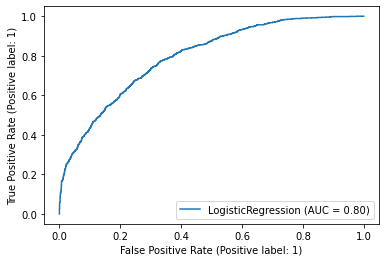

In [89]:
plot_roc_curve(lor,x_test,y_test)

# VALIDATING THE MODEL USING K- FOLD CROSS VALIDATION

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [91]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
scores = cross_val_score(lor, x_train, y_train, cv=kfold)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [0.74893617 0.7248227  0.734375   0.72585227 0.73153409 0.70738636
 0.75710227 0.71590909 0.73721591 0.74857955]
Mean: 0.7331713410702771
Standard deviation: 0.014714751093759576


# USED RANDOM FOREST CLASSIFIER TO BUILD MODEL

In [92]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap = False,
                             criterion = 'entropy',
                             max_depth = None,
                             max_features = 2,
                             min_samples_leaf = 1,
                             min_samples_split = 5,
                             n_estimators = 100)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=2,
                       min_samples_split=5)

In [93]:
predict_rfc = rfc.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [95]:
acc_rfc = round( metrics.accuracy_score(y_test, predict_rfc) * 100 , 2 )
print( 'Accuracy of Random Forest Classifier model : ', acc_rfc )

Accuracy of Random Forest Classifier model :  83.64


In [96]:
print(classification_report(y_test, predict_rfc))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1883
           1       0.84      0.70      0.76      1136

    accuracy                           0.84      3019
   macro avg       0.84      0.81      0.82      3019
weighted avg       0.84      0.84      0.83      3019



In [97]:
print(confusion_matrix(y_test, predict_rfc))

#TP FN
#FP TN

[[1728  155]
 [ 339  797]]


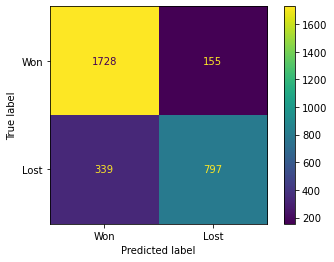

In [98]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve 
plot_confusion_matrix(rfc, x_test, y_test, values_format='d', display_labels=['Won', 'Lost'])

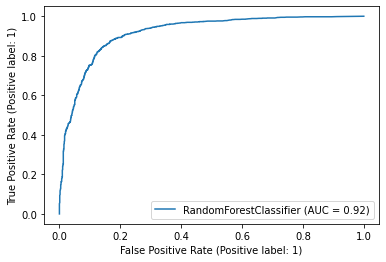

In [99]:
plot_roc_curve(rfc,x_test,y_test)

# USED RANDOMIZED SEARCH CV

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [101]:
parameters={'max_depth':[3,5,None],
            'n_estimators':[10,100,200],
            'max_features':randint(1,3),
            'criterion':['gini','entropy'],
            'bootstrap':[True,False],
            'min_samples_leaf':randint(1,4),
            'min_samples_split': [2,5,10]
              }

In [102]:
rfc_randomcv = RandomizedSearchCV(estimator = rfc,
                                  param_distributions = parameters,
                                  cv = 5,
                                  verbose = 2,
                                  n_jobs = -1, random_state=42)

In [103]:
rfc_randomcv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    criterion='entropy',
                                                    max_features=2,
                                                    min_samples_split=5),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020C6B4735B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020C6B47B2E0>,
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 200]},
                   random_state=42, verbose=2)

In [104]:
rfc_randomcv.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

# VALIDATING THE MODEL USING K- FOLD CROSS VALIDATION

In [105]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
scores = cross_val_score(rfc, x_train, y_train, cv=kfold)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [0.8141844  0.82269504 0.81676136 0.82386364 0.82386364 0.78551136
 0.80965909 0.82528409 0.828125   0.83522727]
Mean: 0.8185174887169568
Standard deviation: 0.012967874568877455


# USED XGBOOST CLASSIFIER TO BUILD MODEL

In [106]:
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [107]:
predict_xgc = xgc.predict(x_test)

In [108]:
acc_xgc = round( metrics.accuracy_score(y_test, predict_xgc) * 100 , 2 )
print( 'Accuracy of XGBoost Classifier model : ', acc_xgc )

Accuracy of XGBoost Classifier model :  80.69


In [109]:
print(classification_report(y_test, predict_xgc))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1883
           1       0.79      0.66      0.72      1136

    accuracy                           0.81      3019
   macro avg       0.80      0.78      0.79      3019
weighted avg       0.81      0.81      0.80      3019



In [110]:
print(confusion_matrix(y_test, predict_xgc))

#TP FN
#FP TN

[[1687  196]
 [ 387  749]]


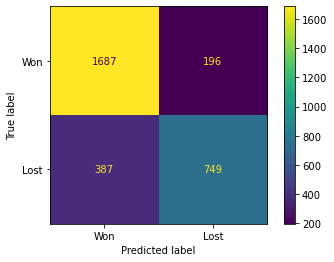

In [111]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve 
plot_confusion_matrix(xgc, x_test, y_test, values_format='d', display_labels=['Won', 'Lost'])

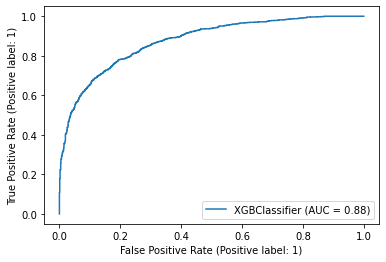

In [112]:
plot_roc_curve(xgc,x_test,y_test)

# VALIDATING THE MODEL USING K- FOLD CROSS VALIDATION

In [113]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
scores = cross_val_score(xgc, x_train, y_train, cv=kfold)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [0.8070922  0.79574468 0.80397727 0.80113636 0.80823864 0.77556818
 0.81534091 0.77698864 0.77982955 0.81534091]
Mean: 0.7979257333978078
Standard deviation: 0.014540760531413014


# MODELS ACCURACY

In [114]:
models = pd.DataFrame({'Model':['LogisticRegression', 'RandomForest', 'XGBoost'],'Score': [acc_lor,acc_rfc, acc_xgc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,RandomForest,83.64
2,XGBoost,80.69
0,LogisticRegression,72.81


# TOP 5 COMBINATION OF SBU HEAD-BID MANAGER

In [115]:
sum(df['Deal Status Code']==1)

3755

In [116]:
combination = df[(df["Deal Status Code"]==1)]
combi = combination[["Name Pair"]].value_counts().rename_axis(["Name Pair"]).reset_index(name='Won Counts')
combi.head()

,Name Pair,Won Counts
0,Long Bergstrom Russell Dahlen,75
1,Rahul Bajpai Rudraksh Sharma,72
2,neeraj kumar Molly Eakes,62
3,Ankita Aggarwal Desmond Krout,53
4,neeraj kumar Vinay Kumar,51


# COMPANY LOSS WRT FALSE PREDICTION

In [117]:
df1 = pd.read_excel(r"C:\Users\hp\Downloads\WinPrediction\Win Prediction\Win_Prediction_Data.xlsx")

In [118]:
compn_df = pd.DataFrame(y_test)
compn_df["Deal Cost"] = df1["Deal Cost"]
compn_df["Actual Values"]= compn_df["Deal Status Code"]
compn_df = compn_df.drop("Deal Status Code",axis = 1)
compn_df["Predicted Values"] = predict_rfc
compn_df = compn_df.reset_index(drop=True)
compn_df.head()

,Deal Cost,Actual Values,Predicted Values
0,147058.82,0,0
1,279411.77,0,0
2,323529.41,1,1
3,226176.47,1,1
4,2558823.53,0,0


In [119]:
sums = 0
for i,j,k in zip(compn_df["Predicted Values"],compn_df["Actual Values"],compn_df["Deal Cost"]):
    if i!=j:
        sums=k+sums        
print(sums)

360492353.1400002
